# Task 2: Classification Models Learning
## (a) NB. 
Train a Naive Bayes classifier using all articles features. Report the \
(i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB classifier and  \
(ii) the top-20 words that maximize the following quantity: \
𝑷(𝑿_𝒘 = 𝟏|𝒀 = 𝒚) / 𝑷(𝑿_𝒘 = 𝟏|𝒀 ≠ 𝒚) \
Which list of words describe the two classes better? Briefly explain your reasoning.

## Code

In [107]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
data = pd.read_csv('train.csv')

In [49]:
data.head()

,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment


### Feature Extraction (Vectorization) using Term Frequency - Inverse Document Frequency (TF-IDF)

In [50]:
# Create the feature matrix using TF-IDF vectorization - encode document
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Text'])

print(f'features\n {vectorizer.get_feature_names_out()}\n')
# summarize encoded vector
print(f'vector shape: {vector.shape}\n')
print(f'article vector\n {vector.toarray()}')

features
 ['00' '000' '000th' ... 'zooms' 'zooropa' 'zorro']

vector shape: (428, 13518)

article vector
 [[0.         0.02011467 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Train

In [51]:
# Create the target variable
y = data['Category']

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X, y)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Top-20 Most Identifiable Words
class_labels = classifier.classes_
top_identifiable_words = []

for i, class_label in enumerate(class_labels):
    class_prob_sorted = classifier.feature_log_prob_[i, :].argsort()
    top_words = [feature_names[word_index] for word_index in class_prob_sorted[:-21:-1]]
    top_identifiable_words.append(top_words)

print("Top-20 Most Identifiable Words:")
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print(', '.join(top_identifiable_words[i]))

# Top-20 Words Maximizing the Quantity
word_quantity = {}

print("\nTop-20 Words Maximizing the Quantity:")
for i, class_label in enumerate(class_labels):
    for word_index in range(len(feature_names)):
        quantity = classifier.feature_log_prob_[i, word_index] - classifier.feature_log_prob_[(i+1) % len(class_labels), word_index]
        word_quantity[feature_names[word_index]] = quantity

    top_quantity_words = sorted(word_quantity, key=word_quantity.get, reverse=True)[:20]
    print(f"Class: {class_label}")
    print(', '.join(top_quantity_words))

Top-20 Most Identifiable Words:
Class: entertainment
film, best, said, show, band, music, year, awards, us, award, actor, album, star, chart, tv, also, number, oscar, top, new
Class: tech
said, people, mobile, software, games, phone, net, users, technology, mr, microsoft, virus, computer, broadband, new, use, could, would, digital, game

Top-20 Words Maximizing the Quantity:
Class: entertainment
film, band, best, actor, album, chart, oscar, singer, award, actress, star, musical, stars, festival, comedy, awards, aviator, theatre, rock, nominated
Class: tech
mobile, software, users, microsoft, games, net, technology, virus, phone, broadband, computer, phones, spam, mail, firms, use, spyware, online, pc, internet


## Report
### Task 2: a) i)
The top-20 most identifiable words that are most likely to occur in the articles over two classes using our NB classifier are:
\
Class: entertainment 
>    film, best, said, show, band, music, year, awards, us, award, actor, album, star, chart, tv, also, number, oscar, top, new 

Class: tech 
>   said, people, mobile, software, games, phone, net, users, technology, mr, microsoft, virus, computer, broadband, new, use, could, would, digital, game \


### Task 2: a) ii)
The top-20 words that maximize the following quantity, 𝑷(𝑿_𝒘 = 𝟏|𝒀 = 𝒚) / 𝑷(𝑿_𝒘 = 𝟏|𝒀 ≠ 𝒚), are: 

Class: entertainment
>    film, band, best, actor, album, chart, oscar, singer, award, actress, star, musical, stars, festival, comedy, awards, aviator, theatre, rock, nominated

Class: tech
>    mobile, software, users, microsoft, games, net, technology, virus, phone, broadband, computer, phones, spam, mail, firms, use, spyware, online, pc, internet


#### Which list of words describe the two classes better? Briefly explain your reasoning
By maximizing 𝑷(𝑿_𝒘 = 𝟏|𝒀 = 𝒚) / 𝑷(𝑿_𝒘 = 𝟏|𝒀 ≠ 𝒚), the list focuses on words that have a greater chance of being in one class than another. In this list, the selected words mobile, software, technology, etc., are highly specific to the tech class. These words are directly associated with technology and have a higher chance of appearing in articles from the tech class. 
Whereas, the "Top-20 Most Identifiable Words" list includes words like 'us' and 'also' that are not as specific to a particular class. These words may occur frequently in either class, have a more general usage across many domains, and may not be as descriptive when it comes to class separation.

Thus, the "Top-20 Words Maximizing the Quantity" list is better for capturing the specific and discriminative words that are more indicative of the class, while the "Top-20 Most Identifiable Words" list includes words that have less class specific information or have a general usage across different domains.


# Task 3: Classification Quality Evaluation
(a) We explore how the size of the training data set affects the test and train accuracy. For each
value of m in [0.1, 0.3, 0.5, 0.7, 0.9], train your classifier on the first m portion of the training
examples (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). \
\
Please report two plots: \
(i) training and \
(ii) testing accuracy for each such value of m with the x-axis referring to m
and the y-axis referring to the classification accuracy in 𝐹𝐹1 measure as shown below. In total,
there should be four curves for training accuracy and four curves for testing accuracy. \
Explain the general trend of the two plots in terms of training and testing accuracy if any. \
𝐹1 = 2 ∙ ( (𝑃recision × 𝑅ecall) / (𝑃recision + 𝑅ecall) ) \
\
(b) Let’s use 5-fold cross-validation to assess model performance. Investigate the impact of key
hyperparameters of your choices for each classifier using a testing dataset. E.g., for SVM, the
classification accuracy may be significantly affected by the kernels and hyperparameter
combination. List hyperparameters for each classifier and demonstrate how these
hyperparameters impact on the testing accuracy. \
\
(c) Report and compare your NB, kNN, SVM and NN classifiers with the best hyperparameter
settings. Summarize what you have observed in the classification accuracy in 𝐹𝐹1 measure on
the testing dataset.

## (a)

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the testing dataset
test_data = pd.read_csv('test.csv')

# Create the feature matrix using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['Text'])
X_test = vectorizer.transform(test_data['Text'])

# Create the target variables
y_train = train_data['Category']
y_test = test_data['Category']

# Define the values of m
m_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []

# Perform m-based training and evaluation
for m in m_values:
    # Calculate the number of examples based on m
    N = int(X_train.shape[0] * m)
    
    # Select the first N examples for training
    X_train_subset, y_train_subset = X_train[:N], y_train[:N]
    
    # Train the Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_subset, y_train_subset)
    
    # Predict on training and testing data
    y_train_pred = classifier.predict(X_train_subset)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate training and testing accuracy using F1 score
    train_accuracy = f1_score(y_train_subset, y_train_pred, average='weighted')
    test_accuracy = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store accuracy values
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Print the evaluation metrics for each m
    print(f"Training Data Siz (m) = {m}")
    print("Training Accuracy (F1-score):", train_accuracy)
    print("Testing Accuracy (F1-score):", test_accuracy)
    print("--------------------------------------")


Training Data Siz (m) = 0.1
Training Accuracy (F1-score): 1.0
Testing Accuracy (F1-score): 0.29296437666704855
--------------------------------------
Training Data Siz (m) = 0.3
Training Accuracy (F1-score): 0.9921851121706706
Testing Accuracy (F1-score): 0.9811799289034726
--------------------------------------
Training Data Siz (m) = 0.5
Training Accuracy (F1-score): 0.9953276132685738
Testing Accuracy (F1-score): 0.9624274506868795
--------------------------------------
Training Data Siz (m) = 0.7
Training Accuracy (F1-score): 0.9966559680375818
Testing Accuracy (F1-score): 0.9624274506868795
--------------------------------------
Training Data Siz (m) = 0.9
Training Accuracy (F1-score): 0.9948051948051948
Testing Accuracy (F1-score): 0.971797848780413
--------------------------------------


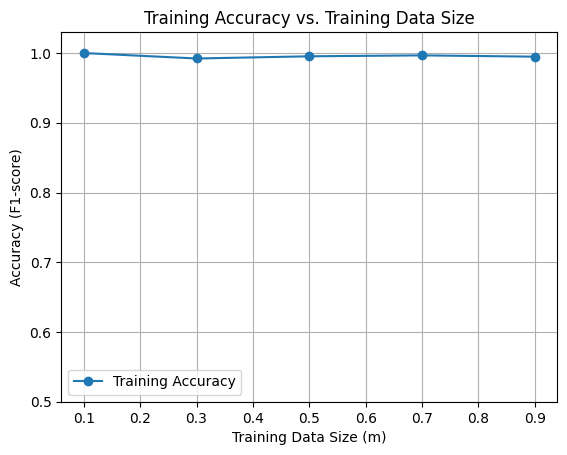

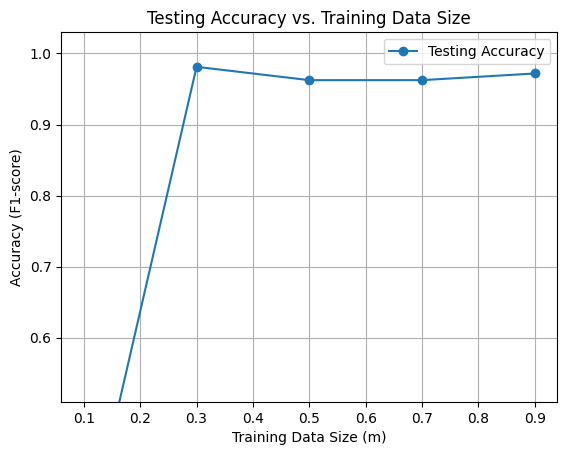

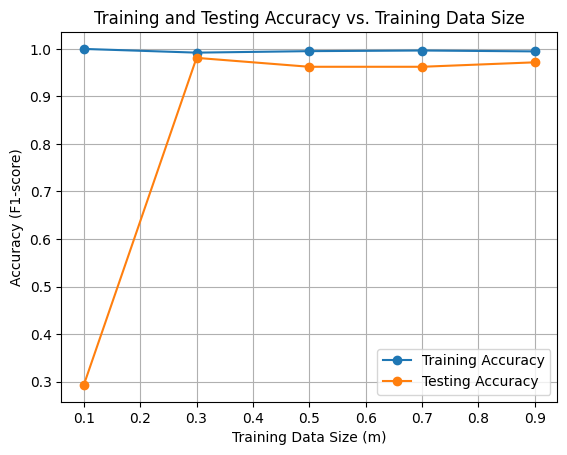

In [75]:
import matplotlib.pyplot as plt1

# Plot the training accuracy curves
plt1.plot(m_values, train_accuracies, marker='o', label="Training Accuracy")
plt1.xlabel("Training Data Size (m)")
plt1.ylabel("Accuracy (F1-score)")
plt1.title("Training Accuracy vs. Training Data Size")
plt1.legend()
plt.ylim(0.5, 1.03)
plt.grid(True)
plt1.show()


import matplotlib.pyplot as plt2

# Plot the testing accuracy curves
plt2.plot(m_values, test_accuracies, marker='o', label="Testing Accuracy")
plt2.xlabel("Training Data Size (m)")
plt2.ylabel("Accuracy (F1-score)")
plt2.title("Testing Accuracy vs. Training Data Size")
plt2.legend()
plt.ylim(0.51, 1.03)
plt.grid(True)
plt2.show()


import matplotlib.pyplot as plt

# Plot the training and testing accuracy curves
plt.plot(m_values, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(m_values, test_accuracies, marker='o', label="Testing Accuracy")
plt.xlabel("Training Data Size (m)")
plt.ylabel("Accuracy (F1-score)")
plt.title("Training and Testing Accuracy vs. Training Data Size")
plt.legend()
plt.grid(True)
plt.show()

#### Task 3: a) (i) and (ii) above 

#### Explain the general trend of the two plots in terms of training and testing accuracy if any.
The training accuracy is consistently high and close to 1 across all the different sizes of the training data evaluated on. This suggests that the classifier is able to learn the patterns in the training data well. 

On the other hand, the testing accuracy is significantly lower than the training accuracy when m = 0.1 which indicates that the classifier may be overfitting to the training data and not generalizing well to unseen data when evaluated on a much smaller subset of the training data. However when the subset increases, i.e. m = 0.3/0.5/0.7/0.9, both the training and testing accuracies (F1 measures) are high (close to 1) and close to each other, indicating a good balance between model performance on the training and testing datasets.


The training accuracy is consistently high and close to 1 across all the different sizes of the training data evaluated. This suggests that the classifier is able to  learn the patterns and features present in the training data. As more training data is included, the classifier becomes more capable of capturing the underlying patterns, resulting in higher accuracy.

Testing Accuracy: 
The testing accuracy, on the other hand, shows a noticeable difference in performance when evaluated on a smaller subset of the training data (threshold 0.1). In this case, the testing accuracy is significantly lower than the training accuracy. This suggests that the classifier may be overfitting to the small training subset, meaning it is overly specialized to the specific characteristics of that subset and unable to generalize well to unseen data.
However, as the size of the training data increases (thresholds 0.3, 0.5, 0.7, 0.9), we observe that both the training and testing accuracies (F1 measures) are high and close to each other. This indicates that the classifier is able to generalize well to unseen data, as the performance on the testing set aligns closely with the performance on the training set. This suggests that the classifier has learned the underlying patterns and features that are representative of the entire dataset rather than being overly influenced by specific instances in the training data.

In summary, the general trend suggests that increasing the size of the training data improves the classifier's ability to generalize and perform well on unseen data. It reduces the risk of overfitting and enhances the classifier's capability to capture the essential patterns and features that are representative of the entire dataset.

## (b)

In [105]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the testing dataset
test_data = pd.read_csv('test.csv')

# Create the feature matrix using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['Text'])
X_test = vectorizer.transform(test_data['Text'])

# Create the target variables
y_train = train_data['Category']
y_test = test_data['Category']

# Define the hyperparameters to investigate
alpha_values = [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]

# Initialize lists to store results
train_scores = []
val_scores = []
test_scores = []

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alpha_values:    
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation folds
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Train the Naive Bayes classifier
        classifier = MultinomialNB(alpha=alpha)
        classifier.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = classifier.predict(X_val_fold)
        
        # Calculate training and validation accuracy
        train_acc = accuracy_score(y_train_fold, classifier.predict(X_train_fold))
        val_acc = accuracy_score(y_val_fold, classifier.predict(X_val_fold))
        
        # Store the scores
        train_scores.append(train_acc)
        val_scores.append(val_acc)
    
    # Calculate average scores across the folds
    avg_train_acc = sum(train_scores) / len(train_scores)
    avg_val_acc = sum(val_scores) / len(val_scores)
    
    # Train the final classifier on the entire training set with the best hyperparameter
    final_classifier = MultinomialNB(alpha=alpha)
    final_classifier.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_test_pred = final_classifier.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store the scores
    train_scores.append(avg_train_acc)
    val_scores.append(avg_val_acc)
    test_scores.append(test_acc)
    
    # Print the results
    print(f"Alpha: {alpha}")
    print(f"Avg Training Accuracy: {avg_train_acc}")
    print(f"Avg Validation Accuracy: {avg_val_acc}")
    print(f"Test Accuracy: {test_acc}")
    print("-------------------------------")

# Print the overall performance summary
print("Overall Performance Summary")
print(f"Best Alpha: {alpha_values[test_scores.index(max(test_scores))]}")
print(f"Best Test F1-score: {max(test_scores)}")


Alpha: 0.001
Avg Training Accuracy: 1.0
Avg Validation Accuracy: 0.9719562243502052
Test Accuracy: 0.9905660377358491
-------------------------------
Alpha: 0.01
Avg Training Accuracy: 0.9994691428633427
Avg Validation Accuracy: 0.9740828255192141
Test Accuracy: 0.9811320754716981
-------------------------------
Alpha: 0.1
Avg Training Accuracy: 0.999109782896982
Avg Validation Accuracy: 0.9768934212162668
Test Accuracy: 0.9716981132075472
-------------------------------
Alpha: 1.0
Avg Training Accuracy: 0.9982877555709893
Avg Validation Accuracy: 0.9768431354525449
Test Accuracy: 0.9716981132075472
-------------------------------
Alpha: 5.0
Avg Training Accuracy: 0.9971740408140487
Avg Validation Accuracy: 0.9747929604405607
Test Accuracy: 0.9716981132075472
-------------------------------
Alpha: 10.0
Avg Training Accuracy: 0.9962432663173932
Avg Validation Accuracy: 0.9720464968716629
Test Accuracy: 0.9716981132075472
-------------------------------
Alpha: 20.0
Avg Training Accuracy:

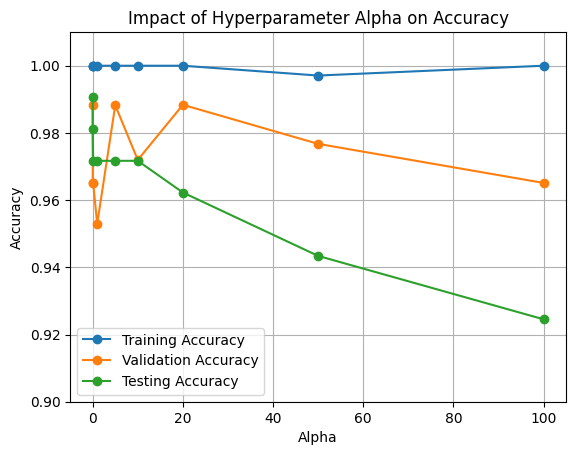

In [106]:
import matplotlib.pyplot as plt

# Plot the training and testing accuracies
plt.plot(alpha_values, train_scores[:len(alpha_values)], marker='o', label='Training Accuracy')
plt.plot(alpha_values, val_scores[:len(alpha_values)], marker='o', label='Validation Accuracy')
plt.plot(alpha_values, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Alpha on Accuracy')
plt.legend()
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.show()
